In [92]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import pandas as pd
import secrets
from networkx.algorithms import community

%matplotlib inline

In [242]:
# Extract the 'dn_hemisphere' attribute of each node and store it in a list
def hemisphere(G):
    hemisphere = []
    for node in G.nodes():
        if 'dn_hemisphere' in G.nodes[node]:
            hemisphere.append(G.nodes[node]['dn_hemisphere'])
    return hemisphere

#generate list of all parent regions with no duplicates
def parentregion(G):
    allparents = []
    for node in G.nodes():
        if 'dn_fsname' in G.nodes[node]:
            s = G.nodes[node]['dn_fsname']
            substrings = s.split("_")
            allparents.append(substrings[0])
    parents = list(set(allparents))
    return parents

#generate list of all parent regions, hemisphere specific, with no duplicates
def parenthem(G):
    allregions = []
    for node in G.nodes():
        if 'dn_name' in G.nodes[node]:
            s = G.nodes[node]['dn_name']
            substrings = s.split("_")
            allregions.append(substrings[0])
    allregions = list(set(allregions))
    return allregions

# Generate n random colors in hexadecimal format
def generatecolors(n):
    colors = ['#' + hex(secrets.randbits(24))[2:].zfill(6) for _ in range(n)]
    return colors

#create a dictionary where nodes are keys and values are parent regions stored as integers
def makez(G):
    parents = parentregion(G)
    allparents = []
    for node in G.nodes():
        if 'dn_fsname' in G.nodes[node]:
            s = G.nodes[node]['dn_fsname']
            substrings = s.split("_")
            allparents.append(parents.index(substrings[0]))

    z = {i+1: val for i, val in enumerate(allparents)}
    return z

#plot of the CCDF of the degree distribution Pr(K>=k) for k>=1
def plot_CCDF(kis):
        # input : a list of degrees, e.g., from a networkx graph G
        # output: a plot of the CCDF of the degree distribution Pr(K>=k) for k>=1

        kmax = max(kis)

        # histogram and plot
        counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
        cumcounts = np.cumsum(counts)
        cumcounts = np.insert(cumcounts,0,0)
        plt.loglog(bins[1:-1], 1-cumcounts[1:-1], 'rs', alpha=0.5)
        plt.xlabel('Degree, k')
        plt.ylabel('Pr(K>=k)')
        plt.show()
        return

In [94]:
#compute stats with non hemisphere specific regions
def compute_stats(G,parent_colors):
    n = len(nx.nodes(G)) # num nodes 
    m = len(nx.edges(G)) # num edges
    kmean = (2*m)/n # mean degree formula for undirected graph
    C = nx.transitivity(G) # clustering coeffcient

    print(f'number of nodes, n  = {n}')
    print(f'number of edges, m  = {m}')
    print(f'mean degree,    <k> = %5.2f' % kmean)
    print(f'clustering coefficient, C     = %5.2f' % C)
    #print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)
    deg = [x[1] for x in nx.degree(G)] # putting the degree component of nx.degree into an array
    plt.rcParams["figure.figsize"] = (15,10)
    node_ops = {"node_size":50}
    edge_ops = {"width": .50, "alpha": 1, "edge_color": "black"}
    pos=nx.spring_layout(G)
    
    parent_dict = {}
    parents = parentregion(G)
    for i, parent in enumerate(parents):
        parent_dict[parent] = parent_colors[i]

    colors = [parent_dict[G.nodes[node]['dn_fsname'].split("_")[0]] for node in G.nodes()]
    plot_CCDF(deg)
    limits=plt.axis('off')
    nx.draw_networkx_nodes(G, pos, **node_ops, node_color=colors)
    nx.draw_networkx_edges(G, pos, **edge_ops)
    #nx.draw_networkx_labels(G,pos)
    
    handles = [mpatches.Patch(color=color, label=parent) for parent, color in parent_dict.items()]
    plt.legend(handles=handles, title='Parent Region', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()


In [257]:
def compute_stats_hemisphere(G):
    
    plt.rcParams["figure.figsize"] = (15,10)
    node_ops = {"node_size":50}
    edge_ops = {"width": .50, "alpha": 1, "edge_color": "black"}
    pos=nx.spring_layout(G)
    
    parent_colors = ['blue','red']
    parent_dict = {}
    parents = hemisphere(G)
    parents = list(set(parents))
    for i, parent in enumerate(parents):
        parent_dict[parent] = parent_colors[i]

    colors = [parent_dict[G.nodes[node]['dn_hemisphere']] for node in G.nodes()]
    limits=plt.axis('off')
    nx.draw_networkx_nodes(G, pos, **node_ops, node_color=colors)
    nx.draw_networkx_edges(G, pos, **edge_ops)
    #nx.draw_networkx_labels(G,pos)
    
    handles = [mpatches.Patch(color=color, label=parent) for parent, color in parent_dict.items()]
    plt.legend(handles=handles, title='Hemisphere', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()


number of nodes, n  = 1015
number of edges, m  = 37477
mean degree,    <k> = 73.85
clustering coefficient, C     =  0.51


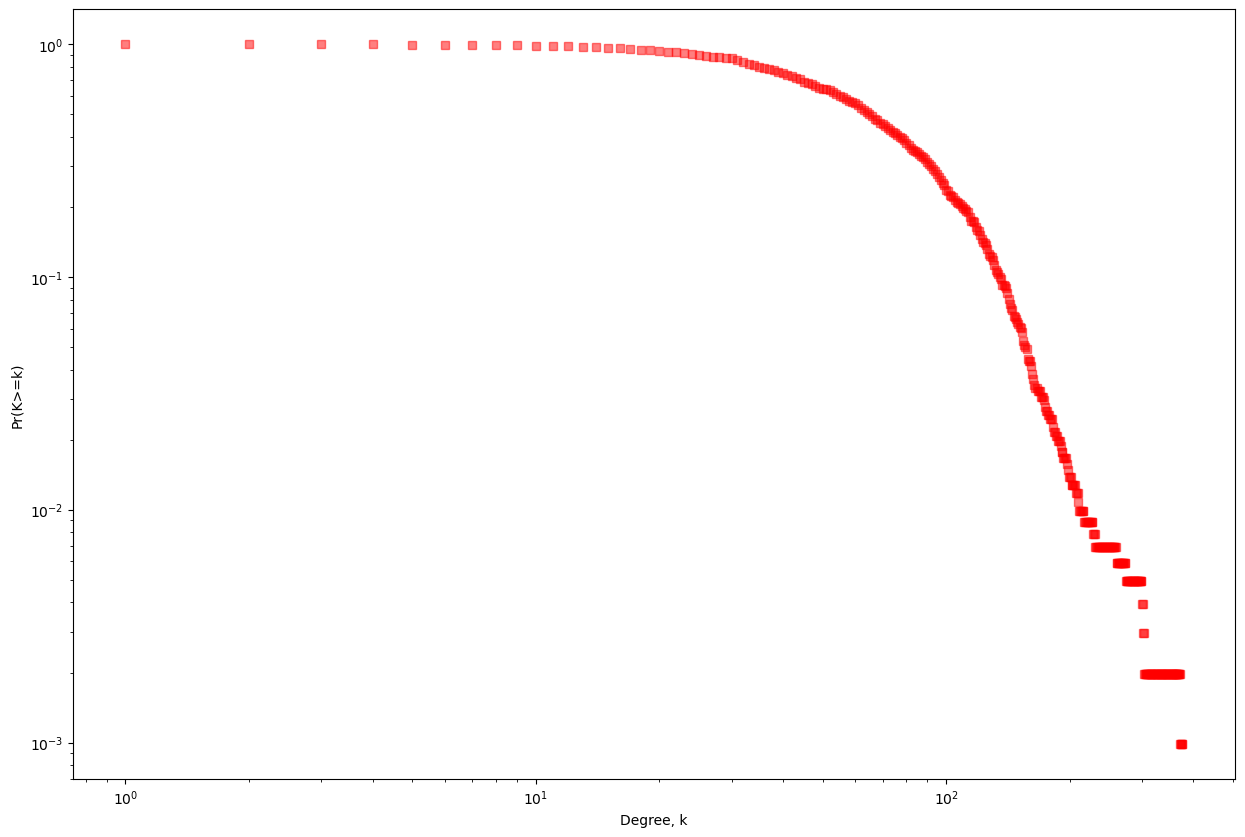

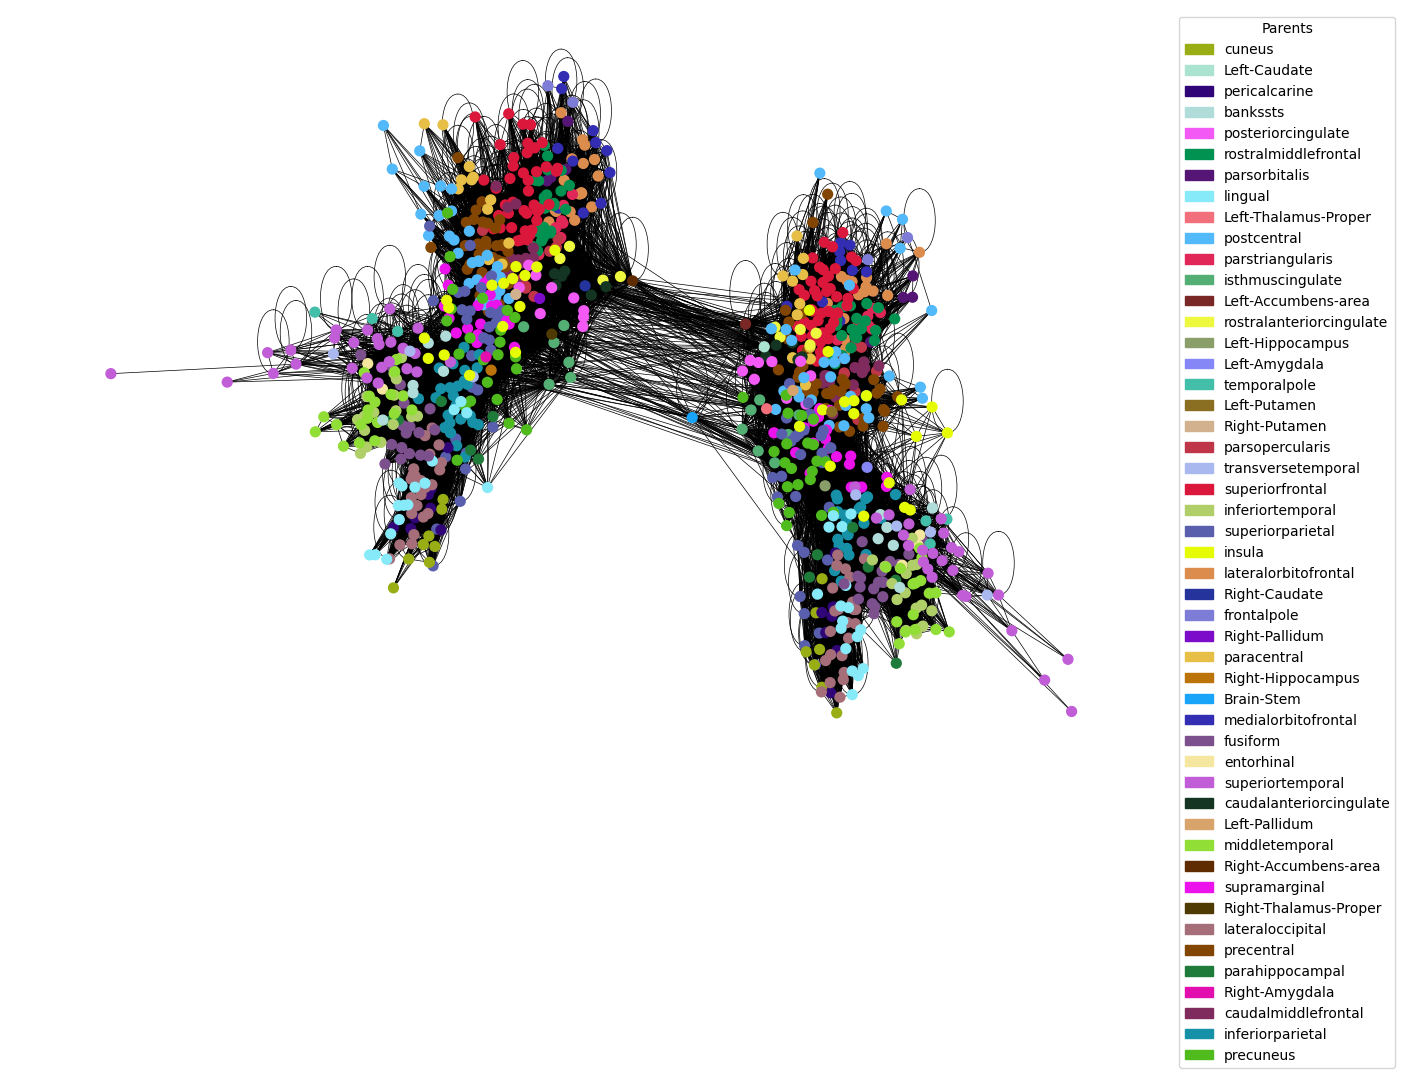

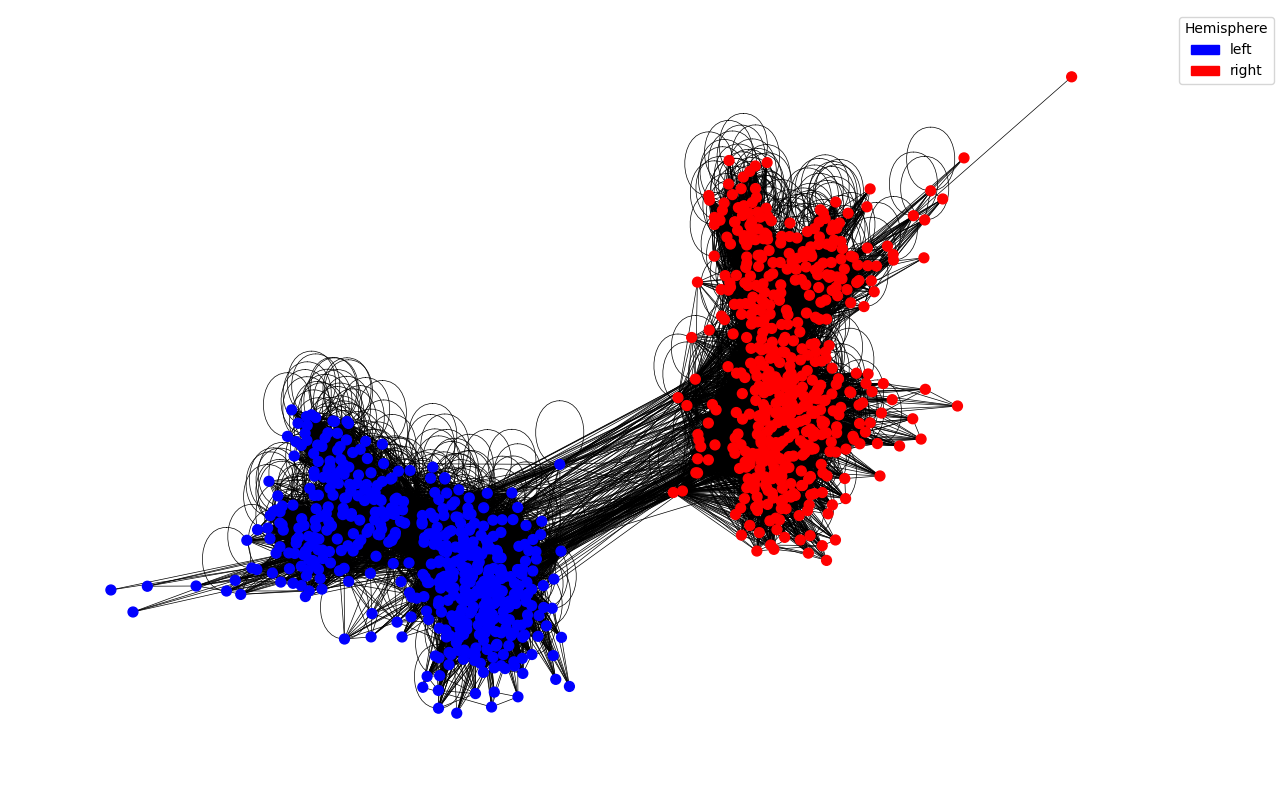

In [258]:
fname1 = 'budapest_connectome_low_confidence.graphml'
fname2 = 'budapest_connectome_medium_confidence.graphml'
fname3 = 'budapest_connectome_high_confidence.graphml'

G1 = nx.read_graphml('./' + fname1)
G2 = nx.read_graphml('./' + fname2)
G3 = nx.read_graphml('./' + fname3)

parent_colors = generatecolors(83)

compute_stats(G1,parent_colors)
compute_stats_hemisphere(G1)

number of nodes, n  = 1015
number of edges, m  = 1000
mean degree,    <k> =  1.97
clustering coefficient, C     =  0.12


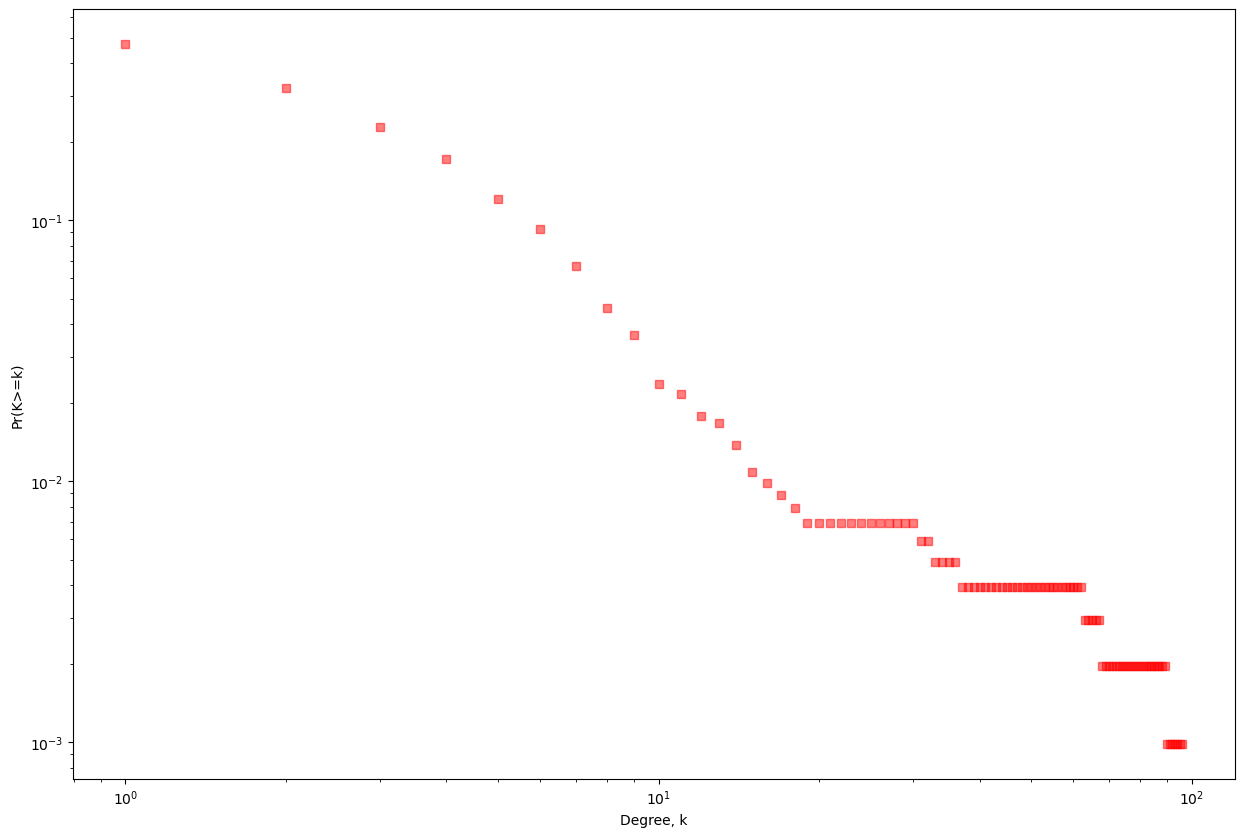

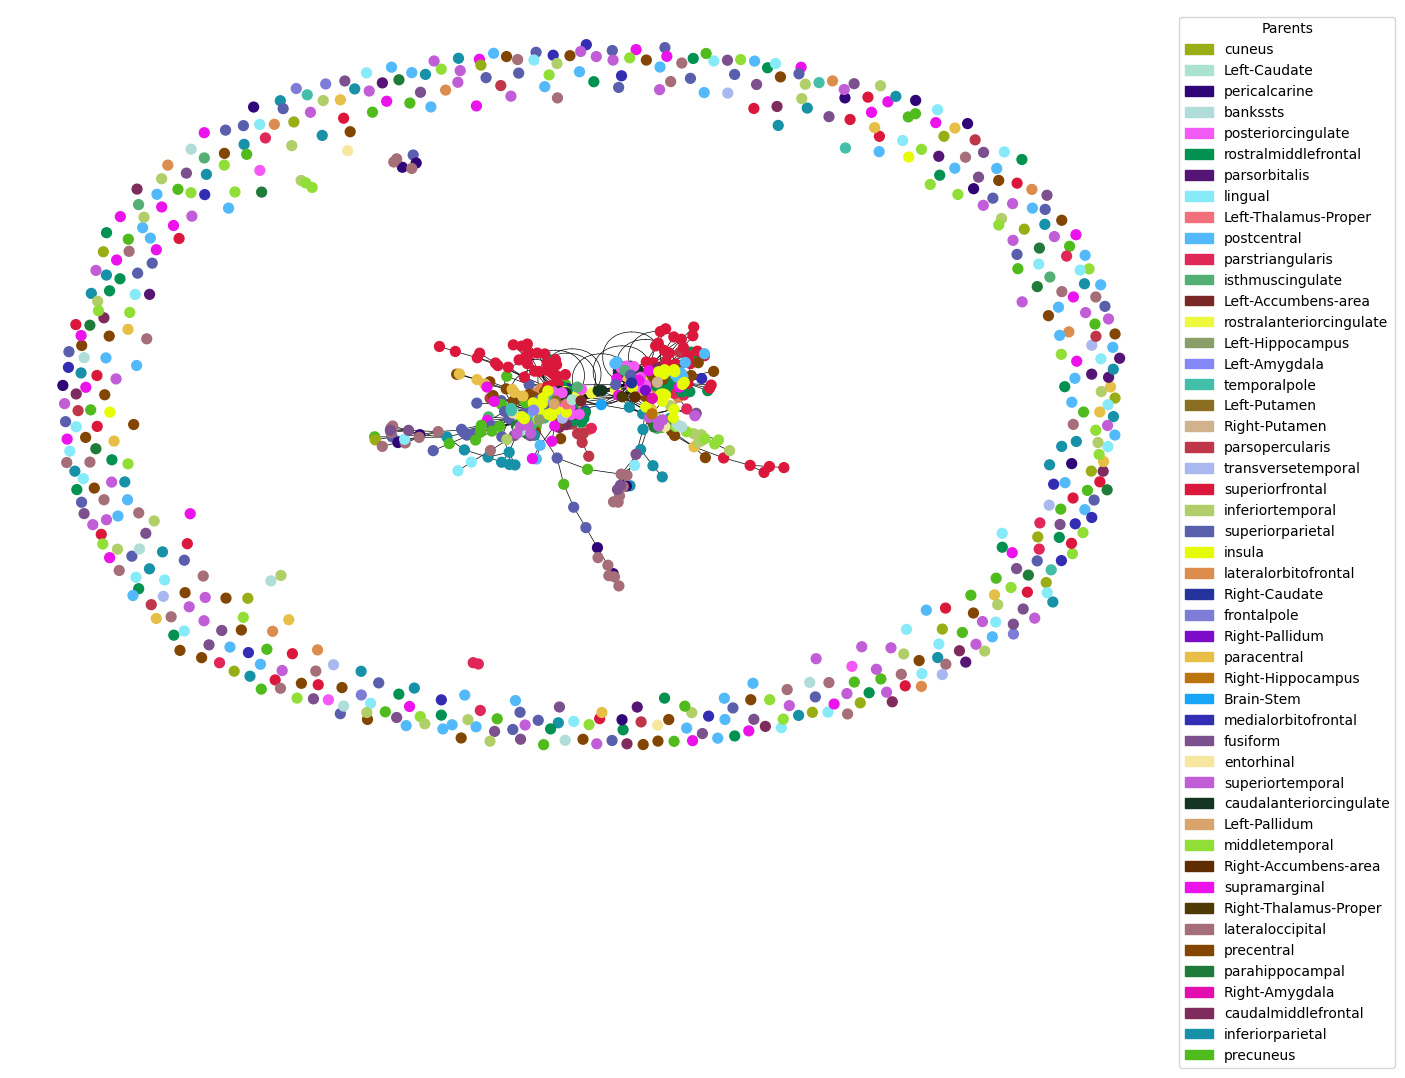

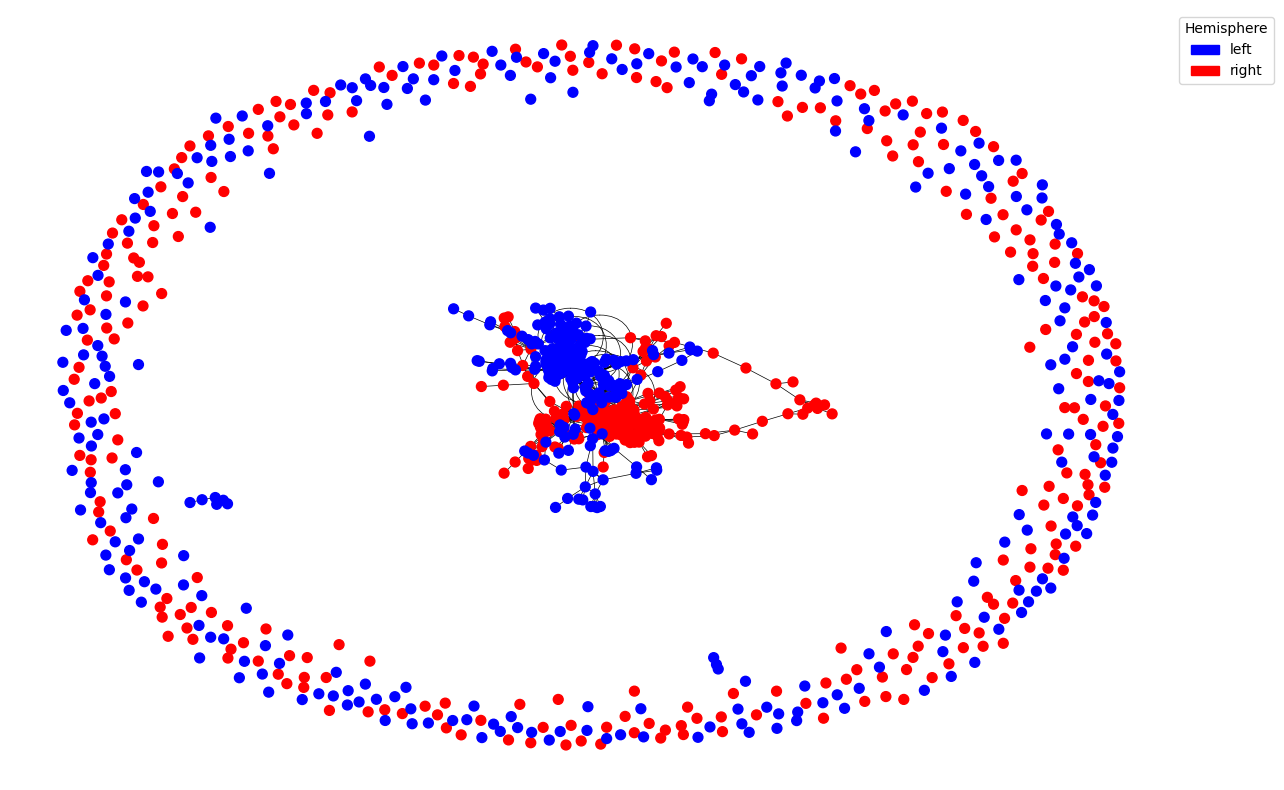

In [259]:
compute_stats(G2,parent_colors)
compute_stats_hemisphere(G2)

number of nodes, n  = 1015
number of edges, m  = 16
mean degree,    <k> =  0.03
clustering coefficient, C     =  0.35


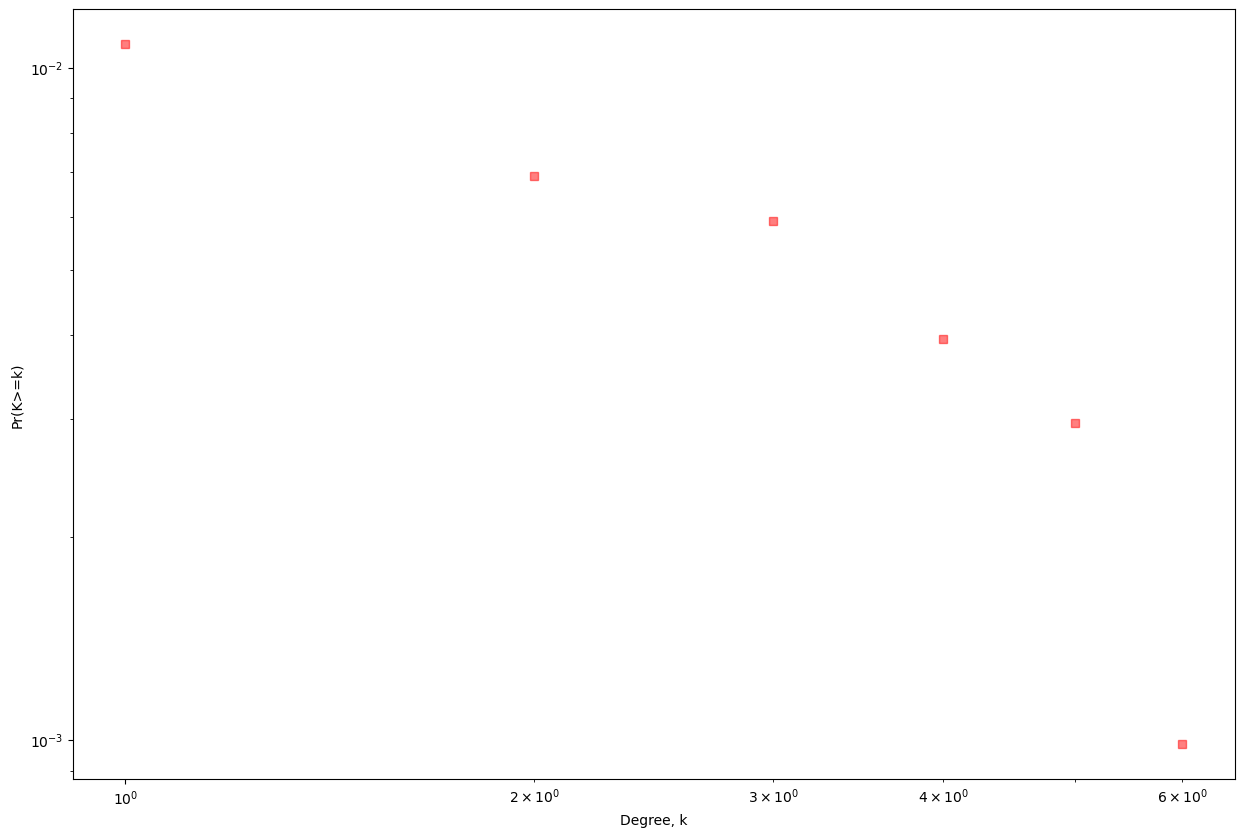

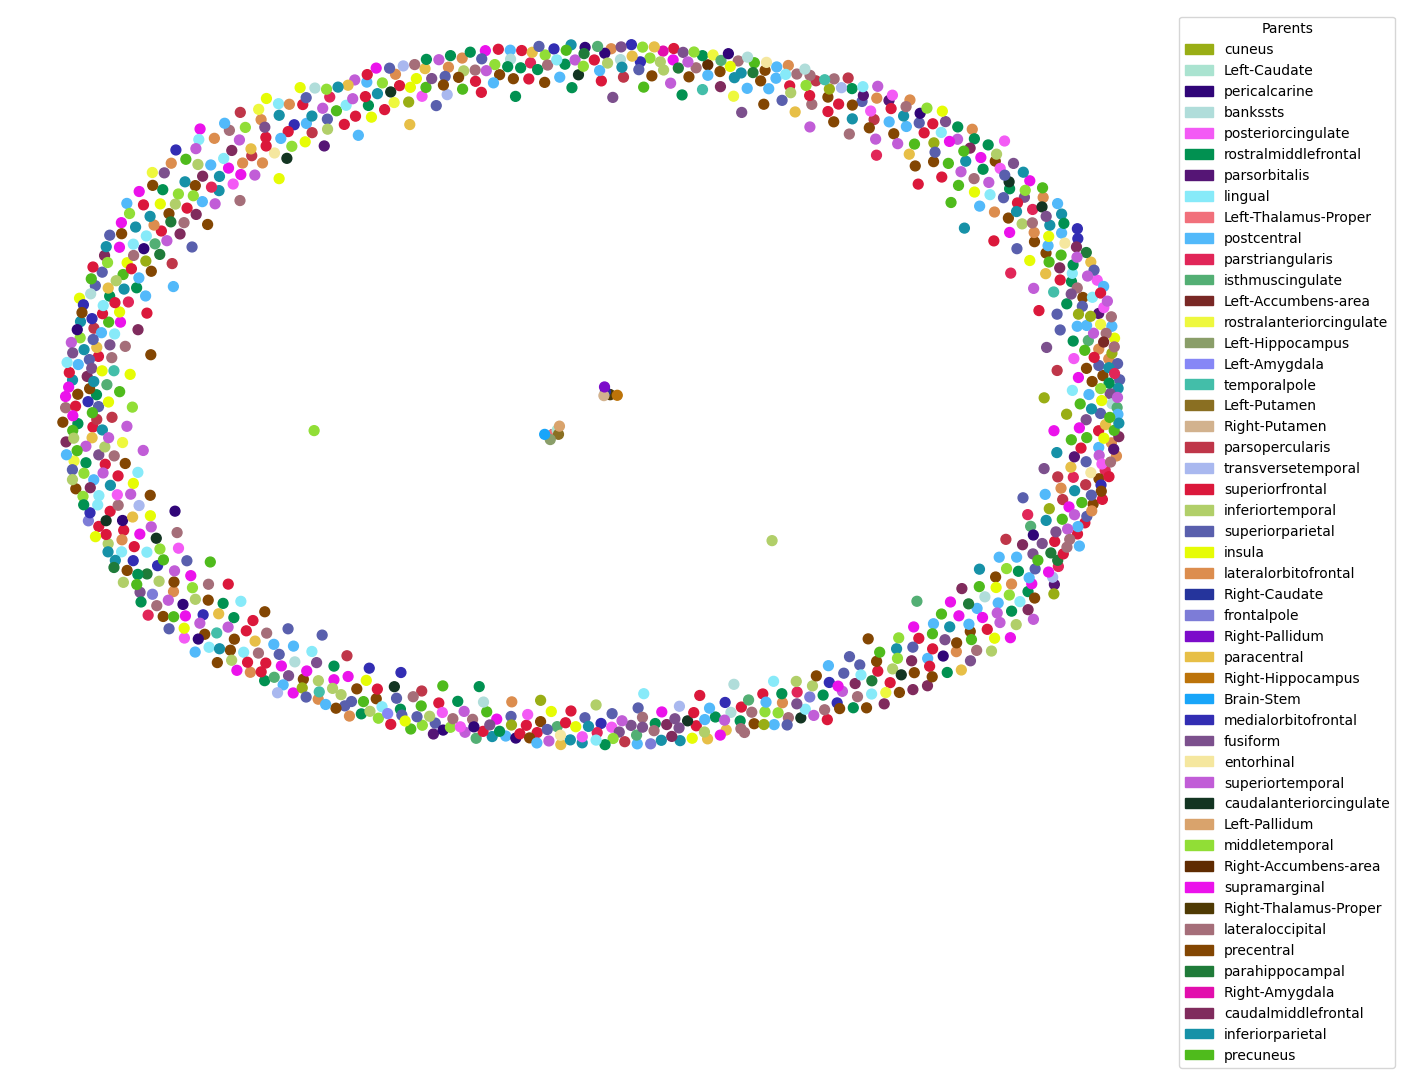

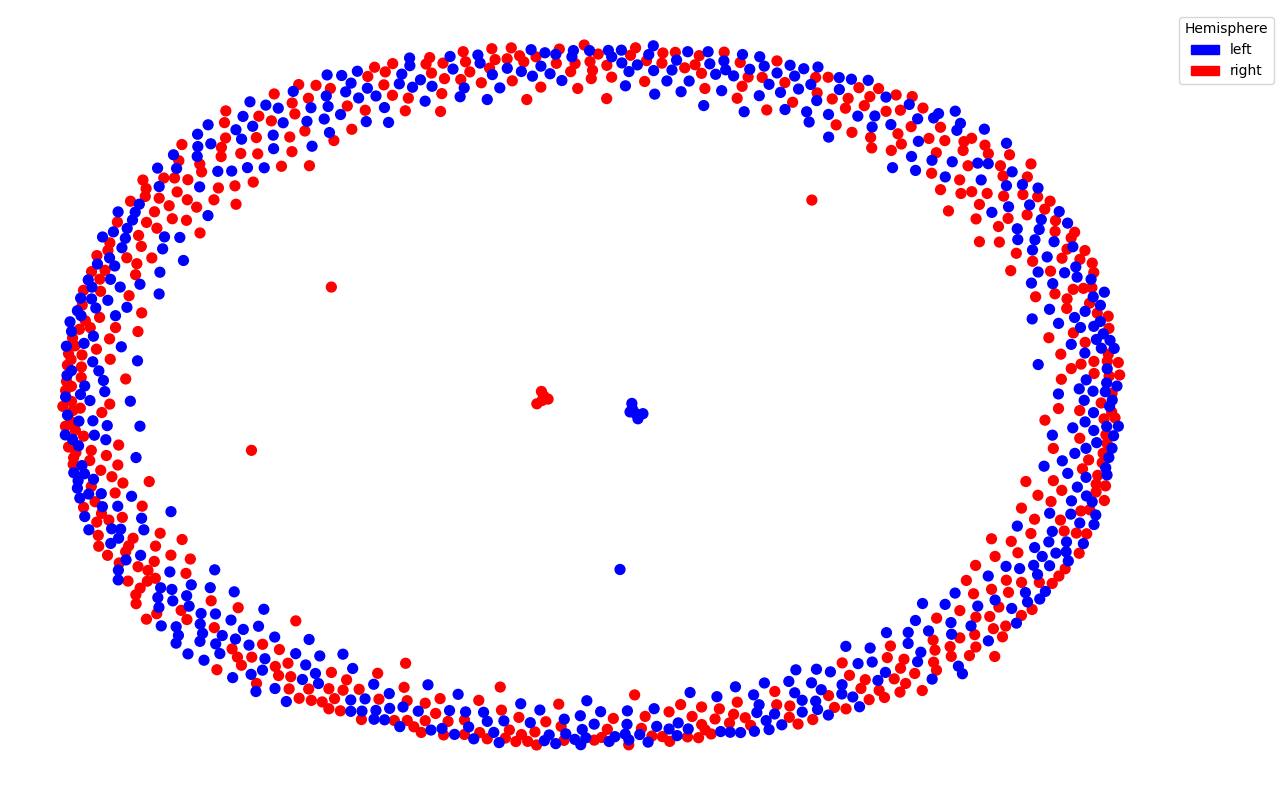

In [260]:
compute_stats(G3,parent_colors)
compute_stats_hemisphere(G3)

>As edge confidence increases, the number of edges decreases. This corresponds to a drop in certainty that two regions interact. However, this allows us to say with high certainty which regions interact consistently among humans. This connectome, which is the cumilation of 477 different human brains of which MRI's were taken, demonstrates that there are 6 parent regions that interact consistently among participants. 

In [261]:
def sizes(G):
    allparents = []
    parents = parentregion(G)
    for node in G.nodes():
        if 'dn_fsname' in G.nodes[node]:
            s = G.nodes[node]['dn_fsname']
            substrings = s.split("_")
            allparents.append(substrings[0])
    
    size = [0]*len(parents)

    for i in range(0,len(parents)):
        for j in range(0,len(allparents)):
            if allparents[j] == parents[i]: 
                size[i] += 1
    return size

    
def tabulate_wk(G,z,c):
    wrs = np.zeros([c,c])
    kpr = np.zeros([c,1])
    
    edges = list(G.edges())

    for e in edges:
        r = z[int(e[0])]
        s = z[int(e[1])]
        wrs[r,s] = wrs[r,s] + 1
        wrs[s,r] = wrs[s,r] + 1

    kpr = np.sum(wrs,axis = 1)

    return wrs,kpr

#create log-likelihood of dcsbm
def dcsbm_LogL(wrs,kpr):
    c = wrs.shape[1]
    logL = 0

    for r in range(c):
        for s in range(c):
            if wrs[r,s] < 1 or kpr[r] < 1 or kpr[s] < 1:
                temp = 0
            else:
                temp = wrs[r,s]*np.log(wrs[r,s]/(kpr[r]*kpr[s]))
            logL = logL + temp

    return logL

#plots log-likelihood trajectory
def plotLL(LL,pc,n):
    tc = len(LL)
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    plt.plot(range(tc), LL, 'b.-', alpha = 0.5)

    for i in rage(pc):
        plt.plot([(i)*(n+1), (i)*(n+1)],[min(LL),max(LL)],'k--',alpha = 0.5)
        LLp = LL[(i)*(n+1):(i+1)*(n+1)]
        b = LLp.index(max(LLp))
        plt.plot([(i)*(n+1)+b],[max(LLp)],'ks',alpha=0.5)

    plt.yblabel('log-likelihood, DC-SBM')
    plt.xlabel('number of partitions considered')
    plt.show()

#generate random partition with n nodes, c groups
def random_z(n,c):
    import random as rnd
    rnd.seed()
    z = dict()

    for i in range(1,n+1):
        z[i] = int(rnd.randint(0,c-1))

    return z

# draws G with node labels from partition z
def drawGz(G,z):
    # input  : G is a networkx graph
    #        : z is a dictionary of group labels for G's nodes
    values = list(z.values())

    if len(list(set(values))) == 2:
        colors = ['blue','red']
    else:
        colors = parent_colors

    node_colors = []
    for i in values:
        node_colors.append(colors[i])

    nx.draw_networkx(G,with_labels=False,node_size=50,width=0.5,node_color=node_colors,alpha=1,edge_color = 'black') # draw it pretty
    limits=plt.axis('off')                                      # turn off axes
    plt.show() 

    return

def makeAMove(G,z,c,f):
    bestL = -np.inf
    for i in G.nodes():
        if f[int(i)] == 0:
            s = int(z[int(i)])
            for r in range(c):
                if r!=s:
                    z[int(i)] = r
                    wrs,kpr = tabulate_wk(G,z,c)
                    thisL = dcsbm_LogL(wrs,kpr)

                    if thisL > bestL:
                        bestMove = [int(i),r]
            z[int(i)] = s
    return bestL, bestMove

def run_OnePhase(G,z0,c):
    import copy

    n = G.order()
    LL = []
    halt = 0
    wrs,kpr = tabulate_wk(G,z0,c)
    L0 = dcsbm_LogL(wrs,kpr)
    LL.append(L0)
    f = dict.fromkeys(range(1,n+1),0)
    t = 0
    Lstar = L0
    zstar = copy.deepcopy(z0)
    tstar = t

    zt = copy.deepcopy(z0)

    for j in range(1,n+1):
        choiceL, choiceMove = makeAMove(G,zt,c,f)
        i = choiceMove[0]
        r = choiceMove[1]
        zt[i] = r
        f[i] = 1
        t = t+1
        Lt = choiceL
        LL.append(choiceL)

        if Lt > Lstar:
            Lstar = Lt
            zstar = copy.deepcopy(zt)
            tstar = t
        
    if tstar == 0:
        halt = 1

    return zstar,Lstar,LL,halt

def fit_DCSBM(G,c,T):
    import copy

    n = G.order()
    LL = []
    halt = 0

    zt = random_z(n,c)
    wrs,kpr = tabulate_wk(G,zt,c)

    Lt = dcsbm_LogL(wrs,kpr)
    pc = 0

    while not halt:
        print(f'phase[{pc}] z[0], logL = {Lt}')
        drawGz(G,zt)

        zstar, Lstar, phaseLL, halt = run_OnePhase(G,zt,c)
        LL.extend(phaseLL)
        zt = copy.deepcopy(zstar)
        Lt = Lstar

        if pc>=T:
            halt = 1
        else:
            pc = pc+1
        
    print(f' --> WE HAVE CONVERGENCE <-- ')
    return zstar, Lstar, LL, pc

>DCSBM on hemisphere split network:

phase[0] z[0], logL = -841316.9083853218


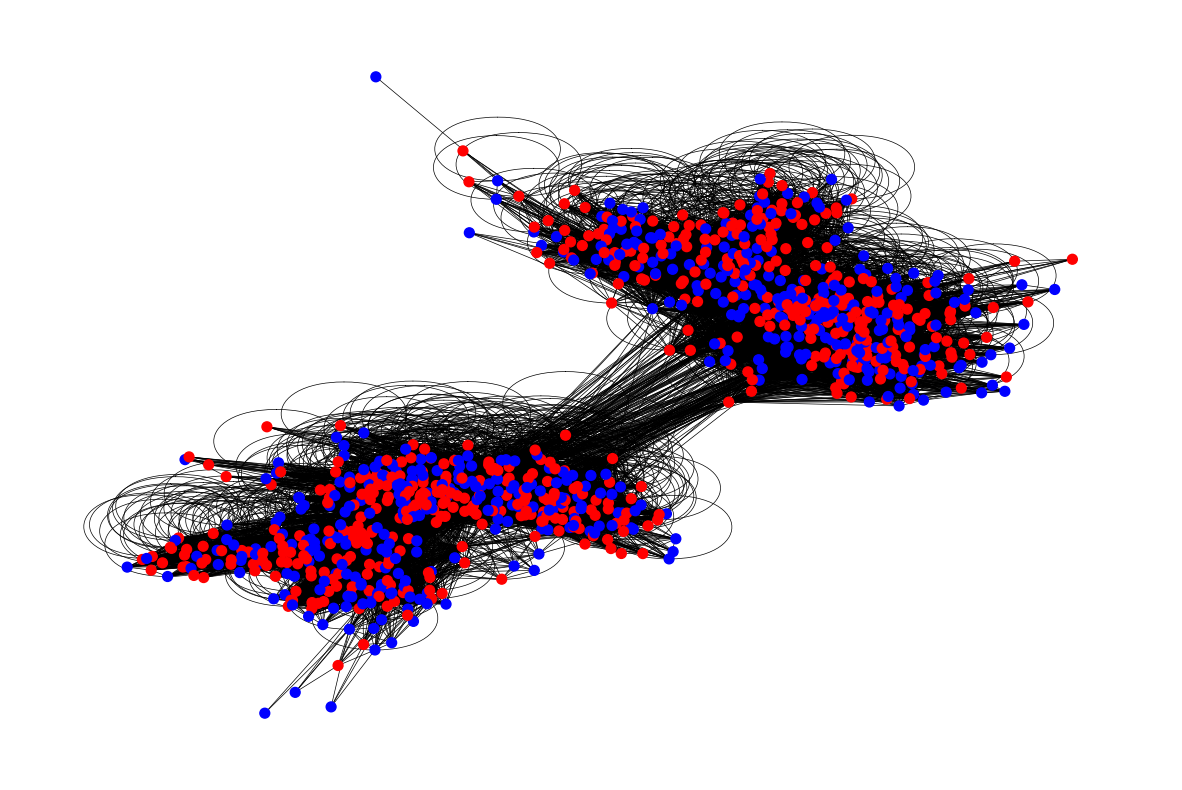

In [262]:
c = 2
T = 10
zstar,Lstar,LL,pc = fit_DCSBM(G1,c,T)
print(f'phase[{pc}] z0, logL = {Lstar}')
drawGz(G1,zstar)
plotLL(LL,pc,G1.order())
wrs,kpr = tabulate_wk(G1,zstar,c)
print(f'kappa_r = ')
print(kpr)
print(f'w_rs = ')
print(wrs)

>DCSBM on 49 group network (parent groups, not by hemisphere)

phase[0] z[0], logL = -839694.1400814136


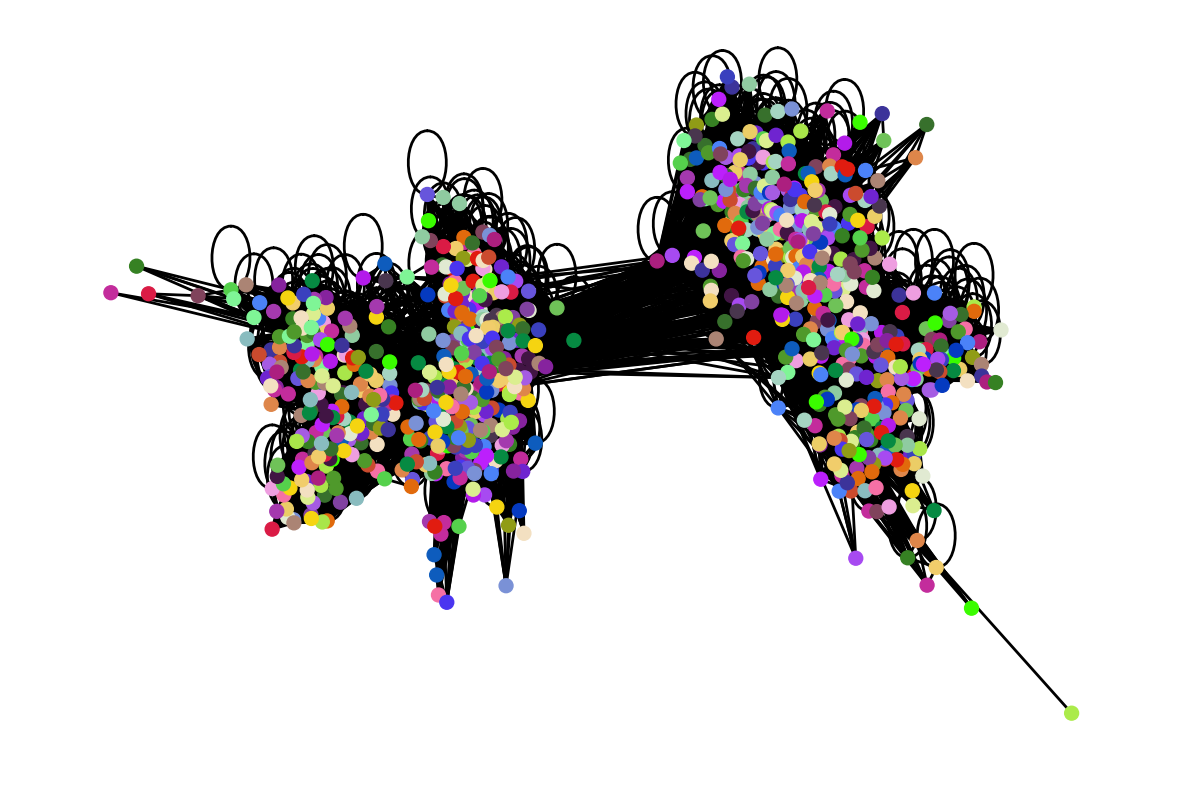

KeyboardInterrupt: 

In [223]:
c = 49
T = 10
zstar,Lstar,LL,pc = fit_DCSBM(G1,c,T)
print(f'phase[{pc}] z0, logL = {Lstar}')
drawGz(G1,zstar)
plotLL(LL,pc,G1.order())
wrs,kpr = tabulate_wk(G1,zstar,c)
print(f'kappa_r = ')
print(kpr)
print(f'w_rs = ')
print(wrs)

number of nodes, n  = 480
number of edges, m  = 1000
mean degree,    <k> =  4.17
clustering coefficient, C     =  0.12


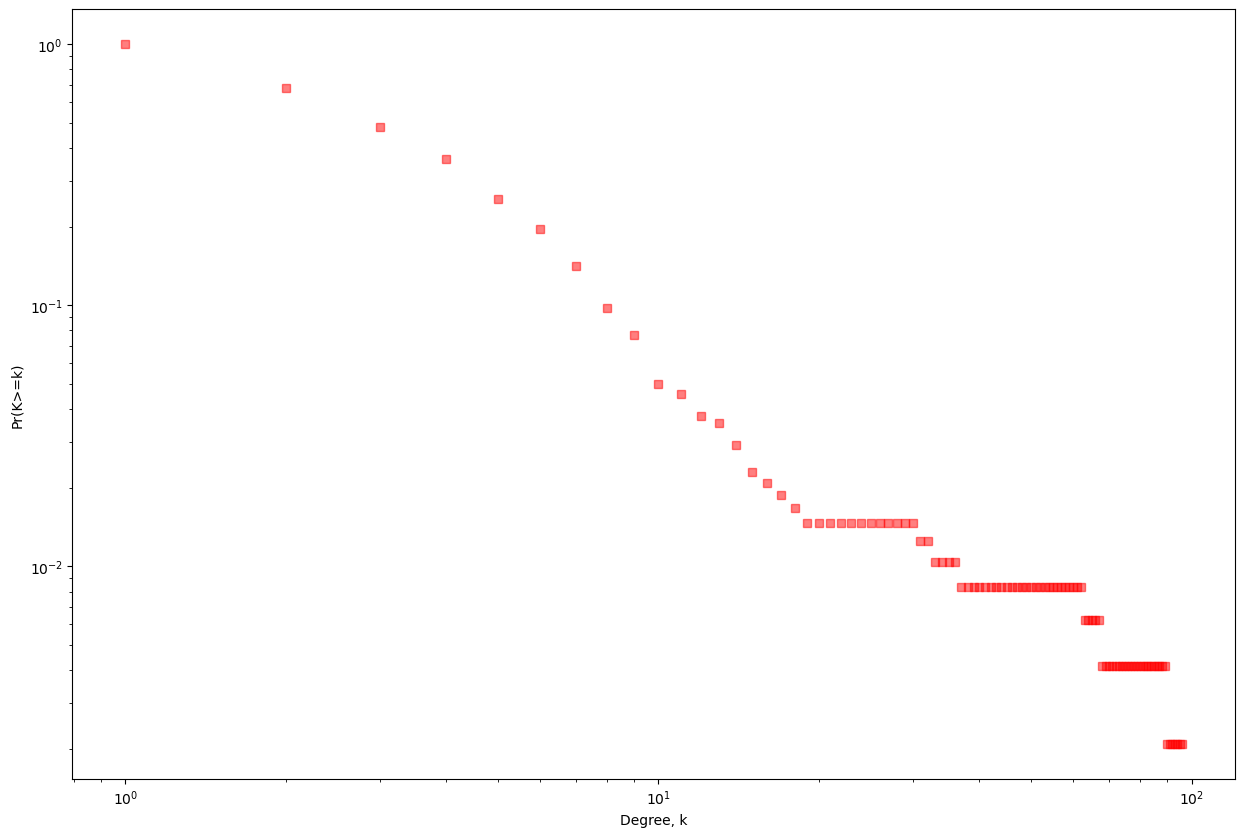

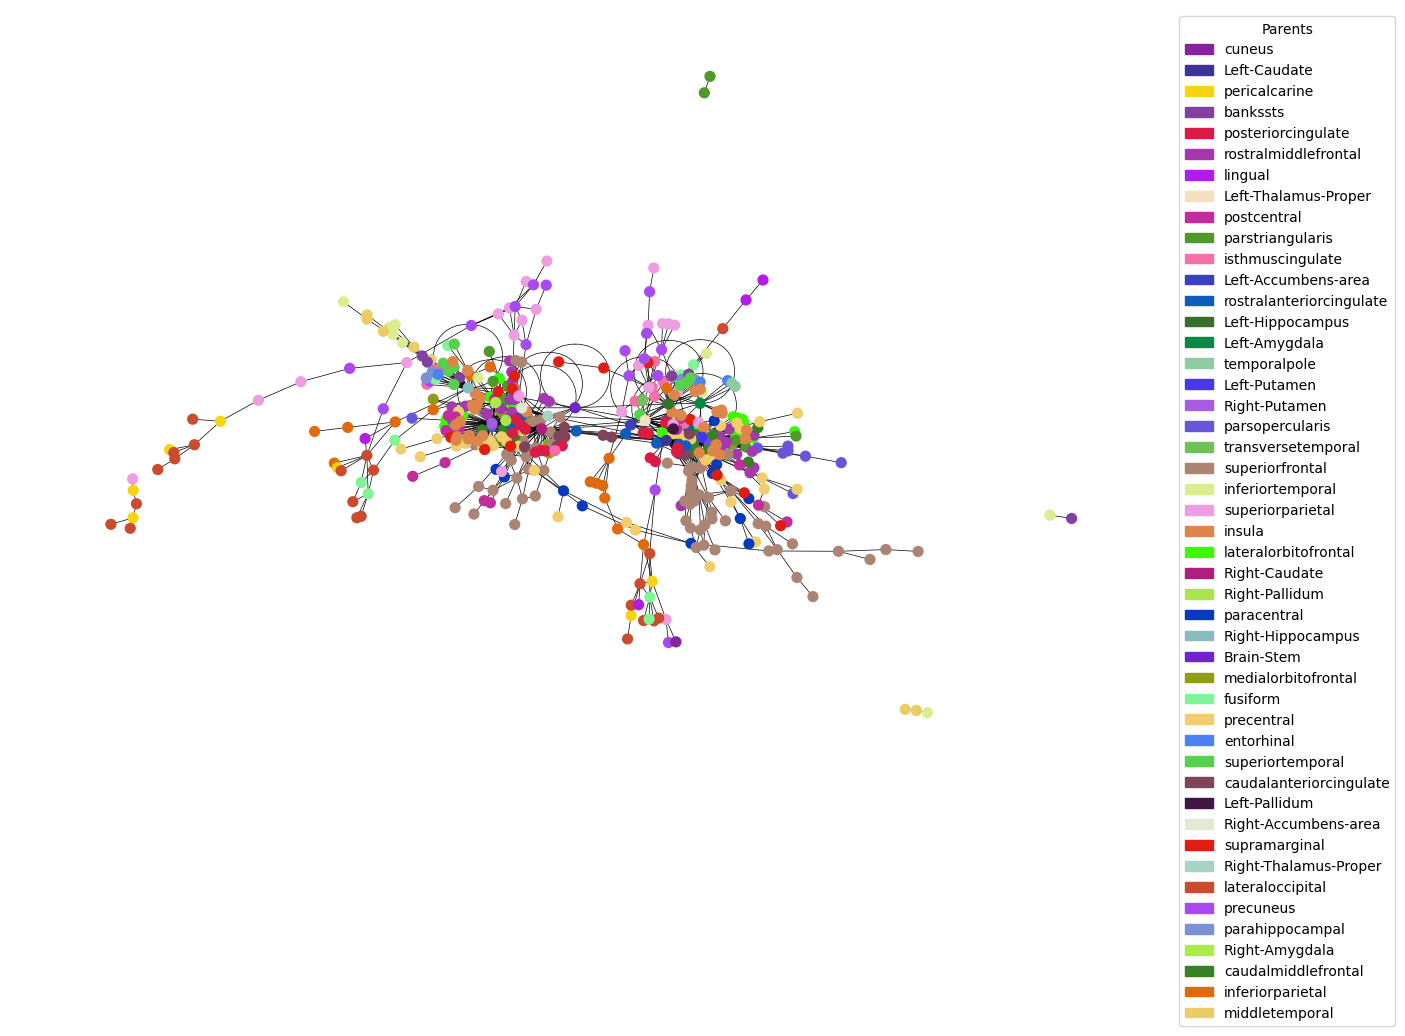

In [224]:
G2edges = nx.read_graphml('./' + fname2)
isolated_nodes = [n for n in G2edges.nodes() if G2edges.degree(n) == 0]
G2edges.remove_nodes_from(isolated_nodes) #testing removing nodes with no edges

compute_stats(G2edges,parent_colors)

phase[0] z[0], logL = -14049.536444146735


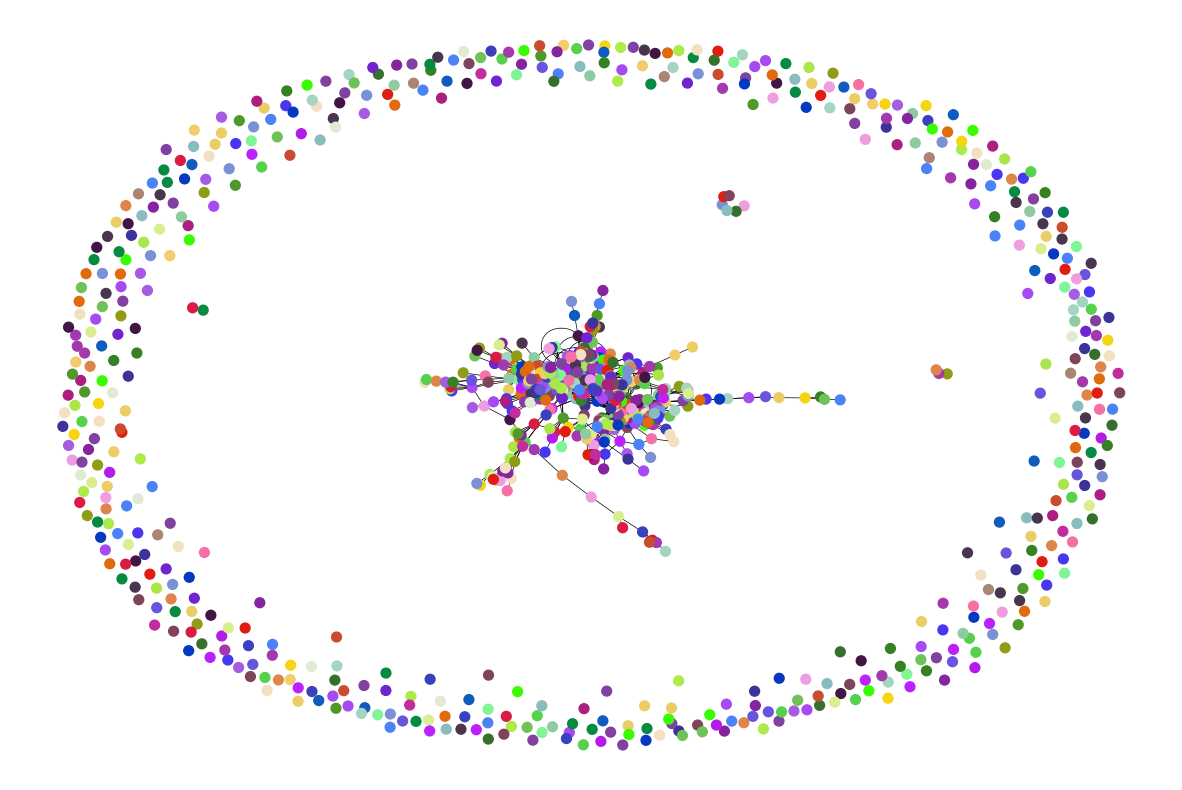

KeyboardInterrupt: 

In [240]:
c = 49
T = 10
zstar,Lstar,LL,pc = fit_DCSBM(G2,c,T)
print(f'phase[{pc}] z0, logL = {Lstar}')
drawGz(G2,zstar)
plotLL(LL,pc,G2.order())
wrs,kpr = tabulate_wk(G2,zstar,c)
print(f'kappa_r = ')
print(kpr)
print(f'w_rs = ')
print(wrs)

phase[0] z[0], logL = -79.21142565543109


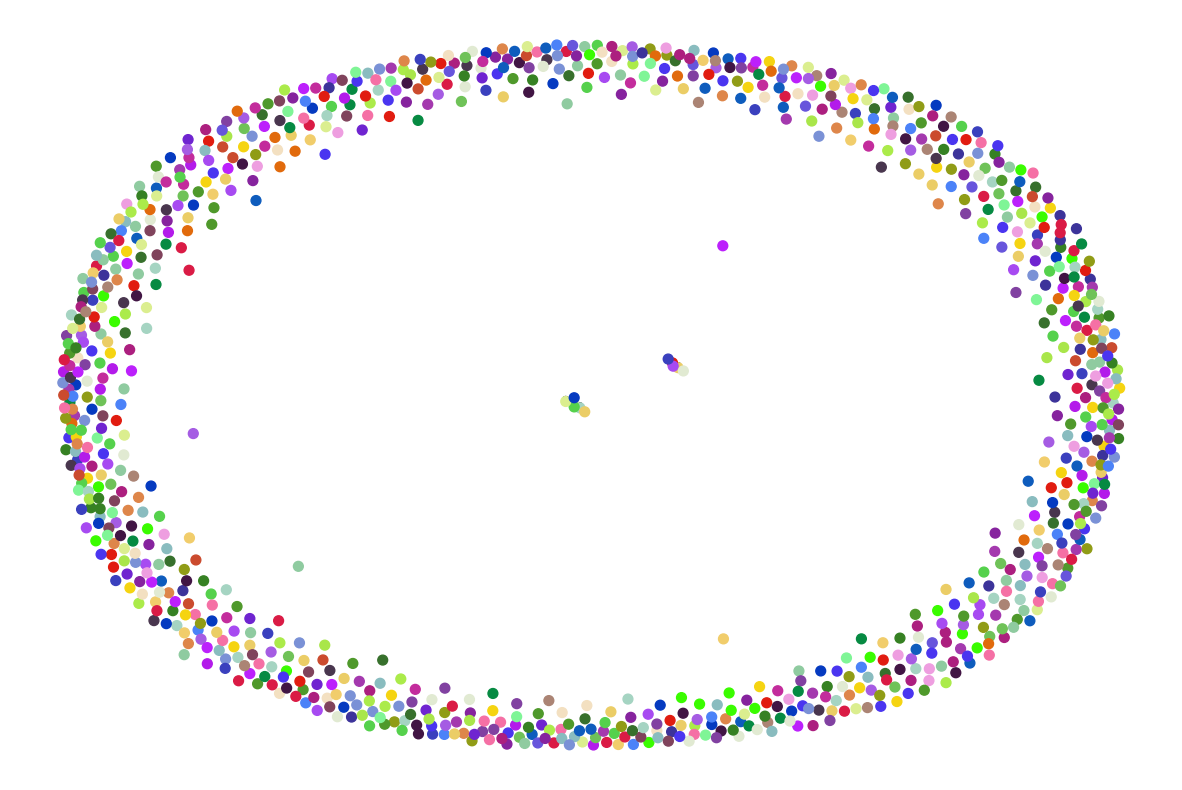

KeyboardInterrupt: 

In [241]:
c = 49
T = 10
zstar,Lstar,LL,pc = fit_DCSBM(G3,c,T)
print(f'phase[{pc}] z0, logL = {Lstar}')
drawGz(G3,zstar)
plotLL(LL,pc,G3.order())
wrs,kpr = tabulate_wk(G3,zstar,c)
print(f'kappa_r = ')
print(kpr)
print(f'w_rs = ')
print(wrs)

In [147]:

#partition = np.random.rand(49,49)
#partition = np.tril(partition) + np.tril(partition, -1).T
import copy

z = makez(G1)
wrs,kpr = tabulate_wk(G1,z,49)
row_sums = wrs.sum(axis=1, keepdims=True)
partition = copy.deepcopy(wrs)
partition = partition/row_sums
s = sizes(G1)
sbm = nx.stochastic_block_model(s, partition)
nx.draw(sbm)

NetworkXException: 'p' must be symmetric.